# Weather Trend Forecasting - Basic Assessment

This notebook covers all basic assessment tasks:
1. **Data Cleaning & Preprocessing** - Missing values, outliers, normalization
2. **Exploratory Data Analysis (EDA)** - Trends, correlations, patterns, visualizations
3. **Model Building** - Basic forecasting model and evaluation

---

## 1. Data Cleaning & Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

pd.set_option('display.max_columns', 50)
%matplotlib inline

### 1.1 Load and Explore the Dataset

We load the Global Weather Repository (125K+ rows, 41 features) covering daily weather for cities worldwide. The dataset includes temperature, precipitation, wind, pressure, humidity, air quality metrics, and geographic metadata. Initial exploration reveals the structure, dtypes, and basic statistics.

In [2]:
df = pd.read_csv('datasets/GlobalWeatherRepository.csv')

print("Dataset Shape:", df.shape)
print("\nFirst few rows:")
df.head()

Dataset Shape: (125501, 41)

First few rows:


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.0,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.1,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.0,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.3,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.0,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125501 entries, 0 to 125500
Data columns (total 41 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   country                       125501 non-null  object 
 1   location_name                 125501 non-null  object 
 2   latitude                      125501 non-null  float64
 3   longitude                     125501 non-null  float64
 4   timezone                      125501 non-null  object 
 5   last_updated_epoch            125501 non-null  int64  
 6   last_updated                  125501 non-null  object 
 7   temperature_celsius           125501 non-null  float64
 8   temperature_fahrenheit        125501 non-null  float64
 9   condition_text                125501 non-null  object 
 10  wind_mph                      125501 non-null  float64
 11  wind_kph                      125501 non-null  float64
 12  wind_degree                   125501 non-nul

In [4]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
country,125501,211,Bulgaria,1482,NaN,NaN,NaN,NaN,NaN,NaN,NaN
location_name,125501,257,Lusaka,645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
latitude,125501.0,NaN,NaN,NaN,19.194285,24.425011,-41.3,3.75,17.25,40.4,64.15
longitude,125501.0,NaN,NaN,NaN,21.992818,65.793975,-175.2,-6.8361,23.24,50.58,179.22
timezone,125501,199,Asia/Bangkok,2344,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last_updated_epoch,125501.0,NaN,NaN,NaN,1743774646.206803,16110193.264009,1715849100.0,1729847700.0,1743758100.0,1757750400.0,1771656300.0
last_updated,125501,21115,2026-02-11 07:45,45,NaN,NaN,NaN,NaN,NaN,NaN,NaN
temperature_celsius,125501.0,NaN,NaN,NaN,21.573732,9.611703,-29.8,16.3,24.1,28.1,49.2
temperature_fahrenheit,125501.0,NaN,NaN,NaN,70.834471,17.30094,-21.6,61.3,75.4,82.6,120.6
condition_text,125501,49,Partly cloudy,37057,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### 1.2 Handle Missing Values & Fix Data Quality

**Strategy:** Numeric columns are imputed with the median (robust to outliers); categorical columns use the mode. The `visibility_km` column had poor variation (often capped at 10) while `visibility_miles` contained the actual values so we derive `visibility_km` from `visibility_miles × 1.60934` for accurate visibility data.

In [5]:
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_df = pd.DataFrame({'Missing Count': missing, 'Percentage (%)': missing_pct})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print("Columns with missing values:")
    display(missing_df)
else:
    print("No missing values found in the dataset.")

No missing values found in the dataset.


In [6]:
object_cols = df.select_dtypes(include=['object']).columns
for col in object_cols[:5]:  # Sample a few
    print(f"\n{col} unique values (sample):", df[col].dropna().unique()[:10])


country unique values (sample): ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria']

location_name unique values (sample): ['Kabul' 'Tirana' 'Algiers' 'Andorra La Vella' 'Luanda' "Saint John's"
 'Buenos Aires' 'Yerevan' 'Canberra' 'Vienna']

timezone unique values (sample): ['Asia/Kabul' 'Europe/Tirane' 'Africa/Algiers' 'Europe/Andorra'
 'Africa/Luanda' 'America/Antigua' 'America/Argentina/Buenos_Aires'
 'Asia/Yerevan' 'Australia/Sydney' 'Europe/Vienna']

last_updated unique values (sample): ['2024-05-16 13:15' '2024-05-16 10:45' '2024-05-16 09:45'
 '2024-05-16 04:45' '2024-05-16 05:45' '2024-05-16 12:45'
 '2024-05-16 18:45' '2024-05-16 11:45' '2024-05-16 14:45'
 '2024-05-16 02:45']

condition_text unique values (sample): ['Partly Cloudy' 'Partly cloudy' 'Sunny' 'Light drizzle' 'Clear'
 'Overcast' 'Moderate or heavy rain with thunder'
 'Patchy light rain in area with thunder' 'Fog'
 'Patchy light rain with thunder']

In [7]:
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

df_clean = df.copy()

# Impute missing values
for col in numeric_cols:
    if df_clean[col].isnull().any():
        median_val = df_clean[col].median()
        df_clean[col].fillna(median_val, inplace=True)
        print(f"Imputed {col} with median: {median_val}")

for col in categorical_cols:
    if df_clean[col].isnull().any():
        mode_val = df_clean[col].mode()[0] if len(df_clean[col].mode()) > 0 else 'Unknown'
        df_clean[col].fillna(mode_val, inplace=True)
        print(f"Imputed {col} with mode: {mode_val}")

# Fix visibility_km: derive from visibility_miles (visibility_km has poor variation in raw data)
df_clean['visibility_km'] = df_clean['visibility_miles'] * 1.60934

print("\nMissing values after imputation:", df_clean.isnull().sum().sum())


Missing values after imputation: 0


### 1.3 Handle Outliers

**IQR Method:** Values outside Q1 − 1.5×IQR and Q3 + 1.5×IQR are considered outliers. We use **winsorization** (capping at these bounds) instead of removing rows, preserving data volume while reducing the impact of extremes. `visibility_km` is excluded from winsorization to avoid collapsing its distribution.

In [8]:
def detect_outliers_iqr(series, multiplier=1.5):
    """Detect outliers using IQR method. Returns mask of non-outliers."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    return ~((series < lower) | (series > upper))

# Key numeric columns for outlier detection (exclude IDs, coordinates, redundant units)
outlier_cols = ['temperature_celsius', 'wind_kph', 'pressure_mb', 'precip_mm', 
                'humidity', 'cloud', 'uv_index', 'gust_kph']

# Count outliers per column (before handling)
print("Outlier counts (IQR method, 1.5x):")
for col in outlier_cols:
    if col in df_clean.columns:
        mask = detect_outliers_iqr(df_clean[col])
        n_outliers = (~mask).sum()
        if n_outliers > 0:
            print(f"  {col}: {n_outliers} outliers ({n_outliers/len(df_clean)*100:.2f}%)")

Outlier counts (IQR method, 1.5x):
  temperature_celsius: 2720 outliers (2.17%)
  wind_kph: 2184 outliers (1.74%)
  pressure_mb: 3935 outliers (3.14%)
  precip_mm: 23453 outliers (18.69%)
  uv_index: 222 outliers (0.18%)
  gust_kph: 3330 outliers (2.65%)


In [9]:
# Strategy: Cap outliers at IQR boundaries (winsorization) rather than removing rows
# This preserves more data while reducing extreme value impact

def winsorize(series, multiplier=1.5):
    """Cap values at IQR boundaries."""
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - multiplier * IQR
    upper = Q3 + multiplier * IQR
    return series.clip(lower=lower, upper=upper)

df_clean = df_clean.copy()
for col in outlier_cols:
    if col in df_clean.columns:
        df_clean[col] = winsorize(df_clean[col])

print("Outliers have been winsorized (capped at IQR boundaries).")

Outliers have been winsorized (capped at IQR boundaries).


### 1.4 Normalize Data

We create two scaled versions for downstream modeling: **Z-score standardization** (mean=0, std=1) for regression-style models, and **Min-Max scaling** to [0,1] for neural networks. The `last_updated` column is parsed for time series analysis.

In [10]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Keep one unit per measurement: celsius, kph, mb, mm, km
cols_to_scale = ['temperature_celsius', 'wind_kph', 'pressure_mb', 'precip_mm', 
                 'humidity', 'cloud', 'feels_like_celsius', 'visibility_km', 
                 'uv_index', 'gust_kph', 'air_quality_Carbon_Monoxide', 
                 'air_quality_Ozone', 'air_quality_Nitrogen_dioxide', 
                 'air_quality_Sulphur_dioxide', 'air_quality_PM2.5', 
                 'air_quality_PM10', 'moon_illumination']

# Filter to only columns that exist
cols_to_scale = [c for c in cols_to_scale if c in df_clean.columns]

In [11]:
df_standardized = df_clean.copy()
scaler_std = StandardScaler()
df_standardized[cols_to_scale] = scaler_std.fit_transform(df_clean[cols_to_scale])

df_normalized = df_clean.copy()
scaler_minmax = MinMaxScaler()
df_normalized[cols_to_scale] = scaler_minmax.fit_transform(df_clean[cols_to_scale])

print("Created two versions:")
print("  - df_standardized: Z-score standardized (mean=0, std=1)")
print("  - df_normalized: Min-Max scaled to [0, 1]")

Created two versions:
  - df_standardized: Z-score standardized (mean=0, std=1)
  - df_normalized: Min-Max scaled to [0, 1]


In [12]:
# Parse last_updated for time series analysis
df_clean['last_updated'] = pd.to_datetime(df_clean['last_updated'], errors='coerce')
df_standardized['last_updated'] = df_clean['last_updated']
df_normalized['last_updated'] = df_clean['last_updated']

invalid_dates = df_clean['last_updated'].isnull()
if invalid_dates.any():
    print(f"Dropping {invalid_dates.sum()} rows with invalid dates")
    df_clean = df_clean[~invalid_dates]
    df_standardized = df_standardized[~invalid_dates]
    df_normalized = df_normalized[~invalid_dates]

print("\nDate range:", df_clean['last_updated'].min(), "to", df_clean['last_updated'].max())


Date range: 2024-05-16 01:45:00 to 2026-02-21 19:45:00


### 1.5 Save Cleaned Data

**Outputs:** `data_cleaned.csv` (raw scale), `data_standardized.csv` (Z-score), `data_normalized.csv` (Min-Max), plus saved scalers for reuse in the advanced assessment.

In [13]:
path = "datasets/basic_assessment/"

# Save cleaned data
df_clean.to_csv(path + 'data_cleaned.csv', index=False)
df_standardized.to_csv(path + 'data_standardized.csv', index=False)
df_normalized.to_csv(path + 'data_normalized.csv', index=False)

# Save scalers for later use
import joblib
joblib.dump(scaler_std, path + 'scaler_standard.pkl')
joblib.dump(scaler_minmax, path + 'scaler_minmax.pkl')
joblib.dump(cols_to_scale, path + 'cols_to_scale.pkl')

print("Saved:")
print("  - data_cleaned.csv (cleaned, no scaling)")
print("  - data_standardized.csv (Z-score scaled)")
print("  - data_normalized.csv (Min-Max scaled)")
print("  - scaler_standard.pkl, scaler_minmax.pkl, cols_to_scale.pkl")

Saved:
  - data_cleaned.csv (cleaned, no scaling)
  - data_standardized.csv (Z-score scaled)
  - data_normalized.csv (Min-Max scaled)
  - scaler_standard.pkl, scaler_minmax.pkl, cols_to_scale.pkl


In [14]:
np.unique(df_clean['visibility_km'])

array([ 0.     ,  1.60934,  3.21868,  4.82802,  6.43736,  8.0467 ,
        9.65604, 12.87472, 14.48406, 17.70274, 20.92142, 22.53076,
       30.57746])

### 2.1 Correlation Analysis

**EDA:** We compute Pearson correlations between temperature, humidity, pressure, precipitation, wind, cloud, visibility, UV index, and feels-like temperature. Strong correlations (e.g., temperature vs feels_like) suggest redundant predictors; negative correlations (e.g., temperature vs humidity in some climates) reveal physical relationships.

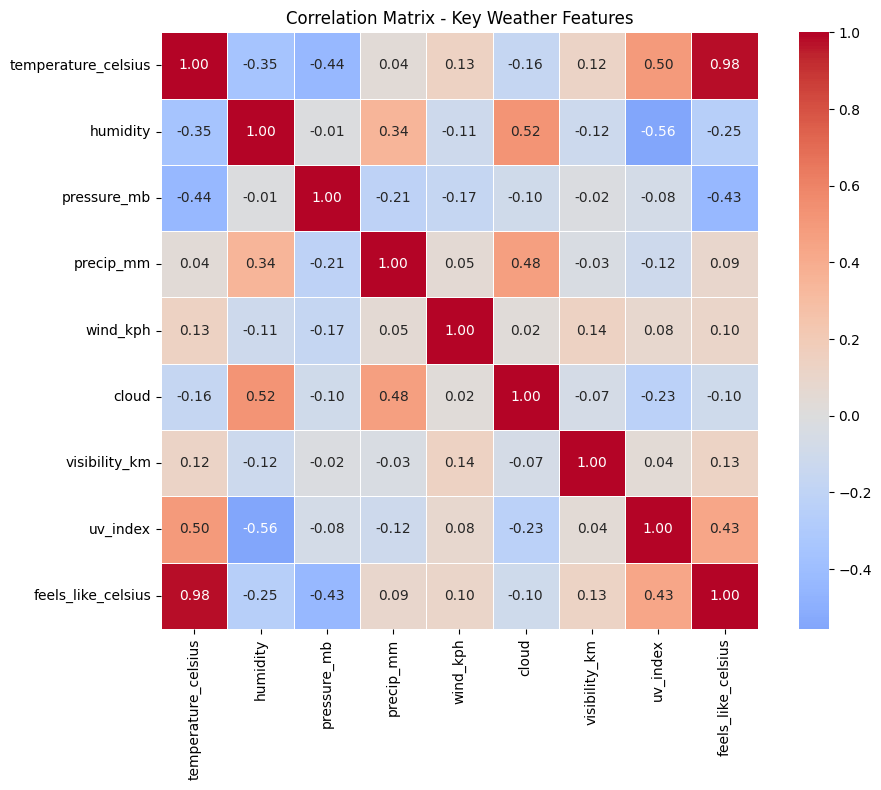

In [15]:
corr_cols = ['temperature_celsius', 'humidity', 'pressure_mb', 'precip_mm', 
             'wind_kph', 'cloud', 'visibility_km', 'uv_index', 'feels_like_celsius']
corr_cols = [c for c in corr_cols if c in df_clean.columns]
corr_matrix = df_clean[corr_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=0.5)
plt.title('Correlation Matrix - Key Weather Features')
plt.tight_layout()
plt.show()

### 2.2 Temperature Visualizations

**Insights:** Distribution histogram shows global temperature spread; box plots by country reveal regional differences; time series shows temporal trends; latitude plot confirms expected gradient (colder at poles).

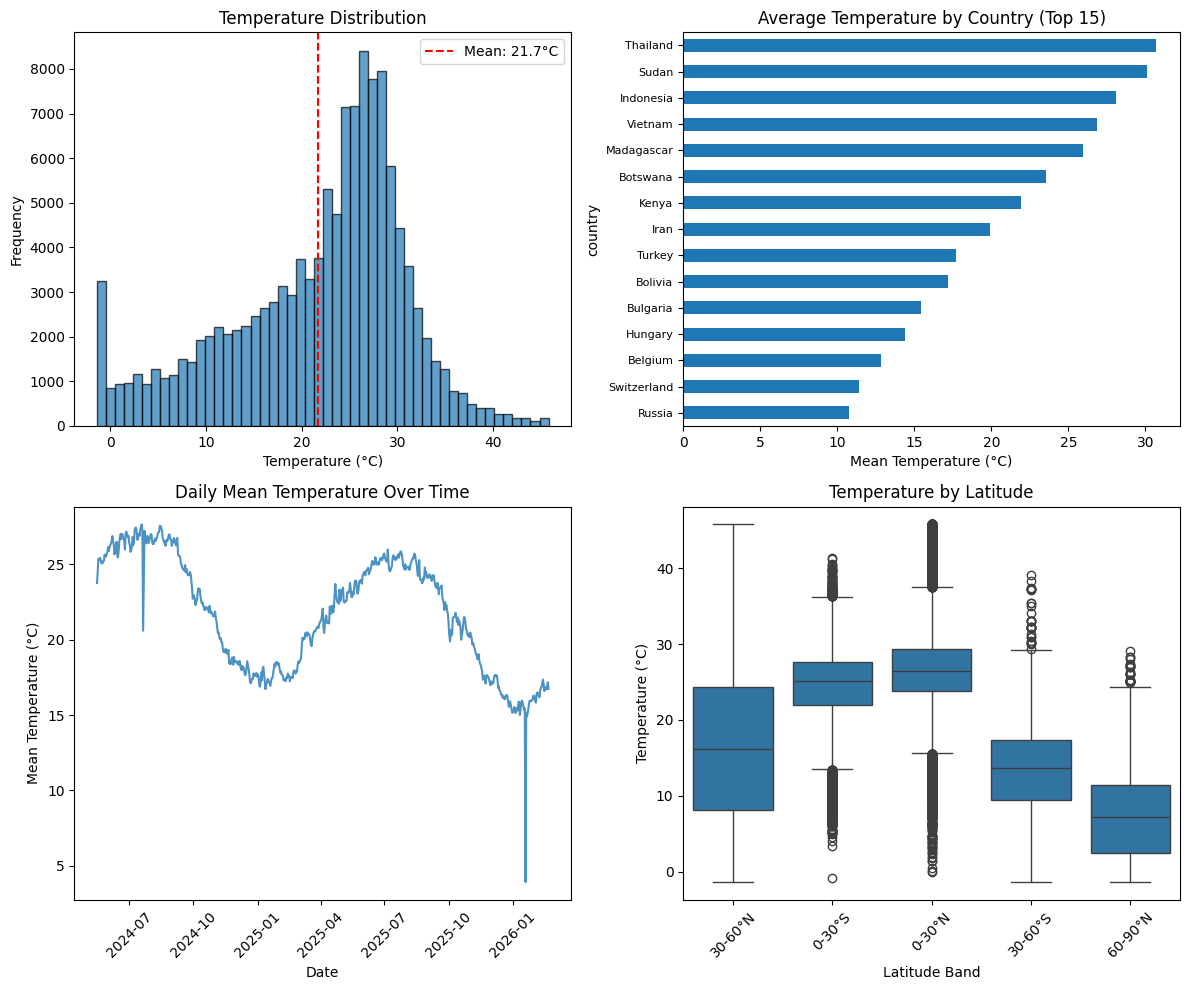

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Histogram
axes[0, 0].hist(df_clean['temperature_celsius'], bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Temperature Distribution')
axes[0, 0].axvline(df_clean['temperature_celsius'].mean(), color='red', linestyle='--', label=f'Mean: {df_clean["temperature_celsius"].mean():.1f}°C')
axes[0, 0].legend()

# Temperature by country (top 15 by count)
top_countries = df_clean['country'].value_counts().head(15).index
temp_by_country = df_clean[df_clean['country'].isin(top_countries)].groupby('country')['temperature_celsius'].mean().sort_values(ascending=True)
temp_by_country.plot(kind='barh', ax=axes[0, 1])
axes[0, 1].set_xlabel('Mean Temperature (°C)')
axes[0, 1].set_title('Average Temperature by Country (Top 15)')
axes[0, 1].tick_params(axis='y', labelsize=8)

# Temperature trend over time (daily average)
df_clean['date'] = df_clean['last_updated'].dt.date
daily_temp = df_clean.groupby('date')['temperature_celsius'].mean().reset_index()
daily_temp['date'] = pd.to_datetime(daily_temp['date'])
axes[1, 0].plot(daily_temp['date'], daily_temp['temperature_celsius'], alpha=0.8)
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Mean Temperature (°C)')
axes[1, 0].set_title('Daily Mean Temperature Over Time')
axes[1, 0].tick_params(axis='x', rotation=45)

# Box plot by latitude bands (proxy for climate zones)
df_clean['lat_band'] = pd.cut(df_clean['latitude'], bins=[-90, -60, -30, 0, 30, 60, 90], 
                               labels=['60-90°S', '30-60°S', '0-30°S', '0-30°N', '30-60°N', '60-90°N'])
df_clean['lat_band'] = df_clean['lat_band'].astype(str)
sns.boxplot(data=df_clean, x='lat_band', y='temperature_celsius', ax=axes[1, 1])
axes[1, 1].set_xlabel('Latitude Band')
axes[1, 1].set_ylabel('Temperature (°C)')
axes[1, 1].set_title('Temperature by Latitude')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### 2.3 Precipitation Visualizations

**Insights:** Precipitation is right-skewed (many dry days, fewer heavy-rain days). Rain vs no-rain comparison by country and over time highlights seasonal and geographic precipitation patterns.

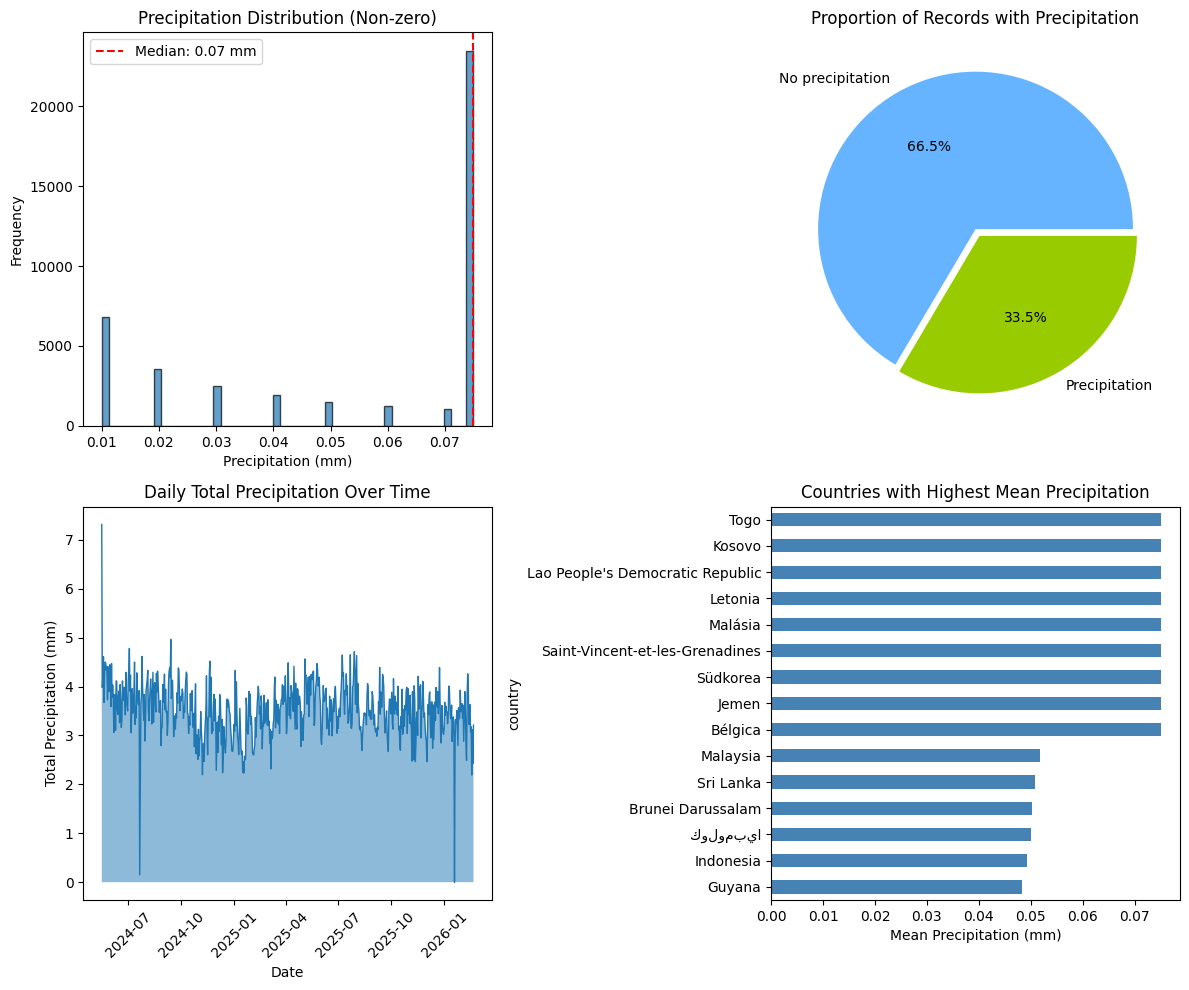

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Precipitation distribution (often right-skewed; filter zeros for log scale)
precip_nonzero = df_clean[df_clean['precip_mm'] > 0]['precip_mm']
axes[0, 0].hist(precip_nonzero, bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_xlabel('Precipitation (mm)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Precipitation Distribution (Non-zero)')
axes[0, 0].axvline(precip_nonzero.median(), color='red', linestyle='--', label=f'Median: {precip_nonzero.median():.2f} mm')
axes[0, 0].legend()

# Proportion of days with vs without precipitation
precip_pct = (df_clean['precip_mm'] > 0).value_counts()
axes[0, 1].pie(precip_pct, labels=['No precipitation', 'Precipitation'], autopct='%1.1f%%', 
               colors=['#66b3ff', '#99cc00'], explode=(0, 0.05))
axes[0, 1].set_title('Proportion of Records with Precipitation')

# Daily total precipitation over time
daily_precip = df_clean.groupby('date')['precip_mm'].sum().reset_index()
daily_precip['date'] = pd.to_datetime(daily_precip['date'])
axes[1, 0].fill_between(daily_precip['date'], daily_precip['precip_mm'], alpha=0.5)
axes[1, 0].plot(daily_precip['date'], daily_precip['precip_mm'], linewidth=1)
axes[1, 0].set_xlabel('Date')
axes[1, 0].set_ylabel('Total Precipitation (mm)')
axes[1, 0].set_title('Daily Total Precipitation Over Time')
axes[1, 0].tick_params(axis='x', rotation=45)

# Mean precipitation by country (top 15)
precip_by_country = df_clean.groupby('country')['precip_mm'].mean()
precip_by_country = precip_by_country.nlargest(15).sort_values()
precip_by_country.plot(kind='barh', ax=axes[1, 1], color='steelblue')
axes[1, 1].set_xlabel('Mean Precipitation (mm)')
axes[1, 1].set_title('Countries with Highest Mean Precipitation')

plt.tight_layout()
plt.show()

### 2.4 Temperature vs Precipitation Patterns

**Insights:** Scatter plot and box plots reveal the relationship between temperature and precipitation—e.g., warmer months may have different precipitation regimes depending on region (tropical vs temperate).

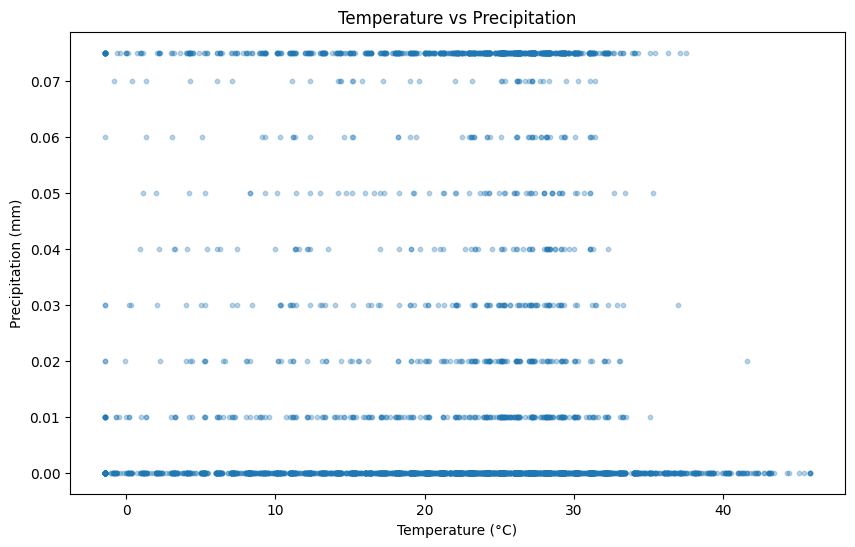


Key Insights:
- Temperature range: -1.4°C to 45.8°C
- Mean temperature: 21.7°C
- Records with precipitation: 33.5%
- Mean precipitation (when > 0): 0.05 mm


In [19]:
# Scatter: Temperature vs Precipitation (sample for readability)
sample = df_clean.sample(min(5000, len(df_clean)), random_state=42)
plt.figure(figsize=(10, 6))
plt.scatter(sample['temperature_celsius'], sample['precip_mm'], alpha=0.3, s=10)
plt.xlabel('Temperature (°C)')
plt.ylabel('Precipitation (mm)')
plt.title('Temperature vs Precipitation')
plt.show()

print("\nKey Insights:")
print(f"- Temperature range: {df_clean['temperature_celsius'].min():.1f}°C to {df_clean['temperature_celsius'].max():.1f}°C")
print(f"- Mean temperature: {df_clean['temperature_celsius'].mean():.1f}°C")
print(f"- Records with precipitation: {(df_clean['precip_mm'] > 0).mean()*100:.1f}%")
print(f"- Mean precipitation (when > 0): {precip_nonzero.mean():.2f} mm")

## 3. Model Building

We build forecasting models that predict **next-day mean temperature** from lagged values and cyclical time features (day of year, month). Linear Regression and Random Forest are trained; MAE, RMSE, MAPE, and R² are used for evaluation.

### 3.1 Prepare Time Series Data

Aggregate to daily mean temperature (global average) for a clean univariate time series to forecast.

In [20]:
# Daily time series (mean temperature per day)
df_clean['date'] = pd.to_datetime(df_clean['last_updated']).dt.date
daily_ts = df_clean.groupby('date').agg({
    'temperature_celsius': 'mean',
    'precip_mm': 'sum',
    'humidity': 'mean'
}).reset_index()
daily_ts['date'] = pd.to_datetime(daily_ts['date'])
daily_ts = daily_ts.sort_values('date').reset_index(drop=True)

# Lag features for forecasting
daily_ts['temp_lag1'] = daily_ts['temperature_celsius'].shift(1)
daily_ts['temp_lag7'] = daily_ts['temperature_celsius'].shift(7)
daily_ts['day_of_year'] = daily_ts['date'].dt.dayofyear
daily_ts['month'] = daily_ts['date'].dt.month

daily_ts = daily_ts.dropna()
print(f"Time series shape: {daily_ts.shape}")
print(f"Date range: {daily_ts['date'].min()} to {daily_ts['date'].max()}")
daily_ts.head()

Time series shape: (639, 8)
Date range: 2024-05-23 00:00:00 to 2026-02-21 00:00:00


,date,temperature_celsius,precip_mm,humidity,temp_lag1,temp_lag7,day_of_year,month
7,2024-05-23,25.066154,4.470,61.287179,25.123077,23.767196,144,5
8,2024-05-24,25.088718,4.330,59.635897,25.066154,24.451648,145,5
9,2024-05-25,25.249744,4.410,59.841026,25.088718,25.355610,146,5
10,2024-05-26,25.254359,3.730,59.466667,25.249744,25.270103,147,5
11,2024-05-27,25.660513,4.405,58.000000,25.254359,25.430769,148,5


### 3.2 Train-Test Split & Build Model

**Features:** Lagged temperature (1–3 days), day-of-year, month (cyclical encoding). Train-test split is time-based (no shuffle) to respect temporal order. Linear Regression provides interpretability; Random Forest captures non-linear patterns.

In [21]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

feature_cols = ['temp_lag1', 'temp_lag7', 'day_of_year', 'month', 'humidity']
X = daily_ts[feature_cols]
y = daily_ts['temperature_celsius']

# Last 20% for test
split_idx = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_idx], X.iloc[split_idx:]
y_train, y_test = y.iloc[:split_idx], y.iloc[split_idx:]

models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(n_estimators=100, max_depth=10, random_state=42)
}

### 3.3 Evaluate Model Performance

**Metrics:** MAE (mean absolute error), RMSE (penalizes large errors), MAPE (percentage error), R² (variance explained). Best model is selected by R²; actual vs predicted plot visualizes fit quality.

In [22]:
def mape(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-8))) * 100

results = []
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results.append({
        'Model': name,
        'MAE': mean_absolute_error(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred)),
        'MAPE': mape(y_test, y_pred),
        'R²': r2_score(y_test, y_pred)
    })

results_df = pd.DataFrame(results)
results_df

,Model,MAE,RMSE,MAPE,R²
0,Linear Regression,0.469513,1.216975,4.301008,0.665267
1,Random Forest,0.841839,1.507510,7.223244,0.486364


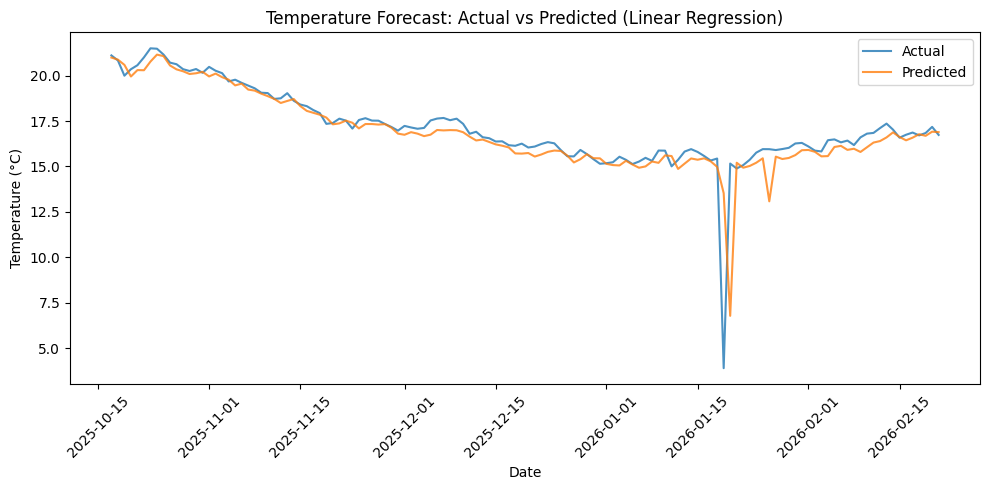

In [23]:
# Actual vs Predicted
best_model_name = results_df.loc[results_df['R²'].idxmax(), 'Model']
best_model = models[best_model_name]
y_pred = best_model.predict(X_test)

fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(daily_ts['date'].iloc[split_idx:split_idx+len(y_test)], y_test.values, label='Actual', alpha=0.8)
ax.plot(daily_ts['date'].iloc[split_idx:split_idx+len(y_test)], y_pred, label='Predicted', alpha=0.8)
ax.set_xlabel('Date')
ax.set_ylabel('Temperature (°C)')
ax.set_title(f'Temperature Forecast: Actual vs Predicted ({best_model_name})')
ax.legend()
ax.tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()